In [184]:
import os
os.environ['AOC_SESSION'] = '53616c7465645f5f37c74a4bd1a2394b4fa5dcbb449244bb183873f839c409c1c2b5d3191175e6de6040979aeb78f7894665a168392bc55c2d58d905f027b397'

In [185]:
import aocd
from aocd.models import Puzzle
day = 14
year = 2024
puzzle = Puzzle(year=year, day=day)
# data = aocd.get_data(day=day, year=year)
with open('./data/input_{:02d}'.format(day), 'w') as fh:
    fh.write(puzzle.input_data)

In [186]:
import re
from collections import Counter
from functools import reduce
from operator import mul
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

In [187]:
test_data = """p=0,4 v=3,-3
p=6,3 v=-1,-3
p=10,3 v=-1,2
p=2,0 v=2,-1
p=0,0 v=1,3
p=3,0 v=-2,-2
p=7,6 v=-1,-3
p=3,0 v=-1,-2
p=9,3 v=2,3
p=7,3 v=-1,2
p=2,4 v=2,-3
p=9,5 v=-3,-3"""
data_test = test_data.splitlines()

In [188]:
data = puzzle.input_data.splitlines()
len(data), data[:10]

(500,
 ['p=43,88 v=84,88',
  'p=18,3 v=-20,-92',
  'p=39,70 v=35,43',
  'p=68,43 v=-82,-12',
  'p=7,24 v=23,-84',
  'p=92,31 v=25,-14',
  'p=53,1 v=-82,-40',
  'p=77,23 v=38,-57',
  'p=21,41 v=29,18',
  'p=67,1 v=-35,8'])

In [293]:
def move(robots, steps, X=11, Y=7):
    x = robots[:, 0]
    y = robots[:, 1]
    vx = robots[:, 2]
    vy = robots[:, 3]
    return np.array([(x + steps * vx) % X, (y + steps * vy) % Y]).T

def quadrants(p,  X=7, Y=11):
    res = np.zeros(p.shape[0])
    # print(p)
    res[(p[:, 0] > (X // 2))] += 1
    res[(p[:, 1] > (Y // 2))] += 2
    # print(res)
    res[(p[:, 0] == (X // 2)) | (p[:, 1] == (Y // 2)) ] = -1
    return res

In [294]:
d = data
X= 101
Y= 103

robots = [list(map(int, re.findall('[-0-9]+', dat))) for dat in d]
np_robs = np.array(robots)


In [296]:
cnt = Counter(quadrants(move(nrob, 100, X=X, Y=Y), X=X, Y=Y))
cnt[-1] = 1
res = reduce(mul, cnt.values())
res

232589280

In [309]:
cnt = Counter(quadrants(move(np_robs, 100, X=X, Y=Y), X=X, Y=Y).astype(int).tolist())
cnt[-1] = 1
res = reduce(mul, cnt.values())
res

232589280

In [310]:
puzzle.answer_a = res

In [382]:
st = 1e9
imin = 0
scores = []
start = 4135 #  start + (101*i)
for i in range(X*Y):
    cnt = Counter(quadrants(move(np_robs, i, X=X, Y=Y), X=X, Y=Y).astype(int).tolist())
    cnt[-1] = 1
    score = reduce(mul, cnt.values())
    scores.append(score)
    if score < st:
        st = score
        imin = i

In [383]:
imin

7569

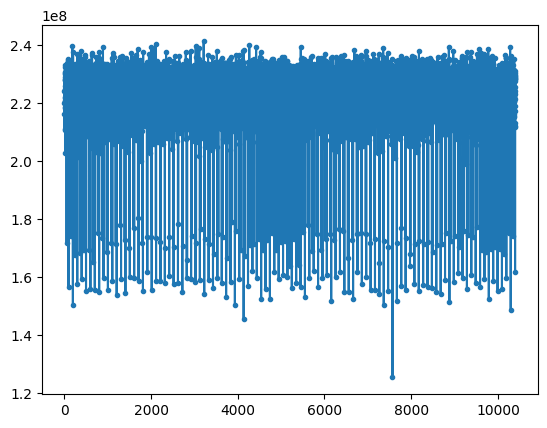

In [385]:
plt.plot(scores, marker='.')

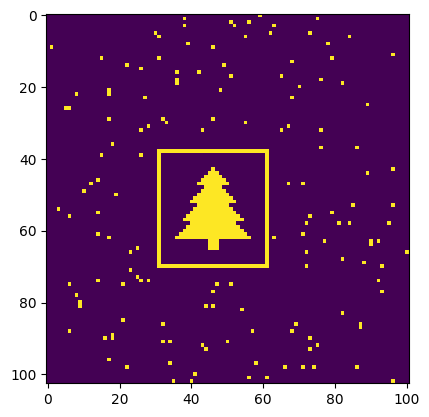

In [381]:
f = np.zeros((Y, X))
for px, py in move(np_robs, imin, X=X, Y=Y):
    f[py, px] = 1
plt.imshow(f)

In [331]:
# find using variances

In [347]:
st = 1e9
imin = 0
scores = []
for i in range(max(X, Y)):
    p = move(np_robs, i, X=X, Y=Y)
    scores.append(p.std(axis=0))

xx, yy = np.argmin(scores, axis=0)    
xx, yy

(95, 50)

In [348]:
for i in range(100):
    if (xx + i* X - yy) % Y == 0:
        print(i, xx + i*X)
        res = xx + i*X
        break
res

74 7569


7569

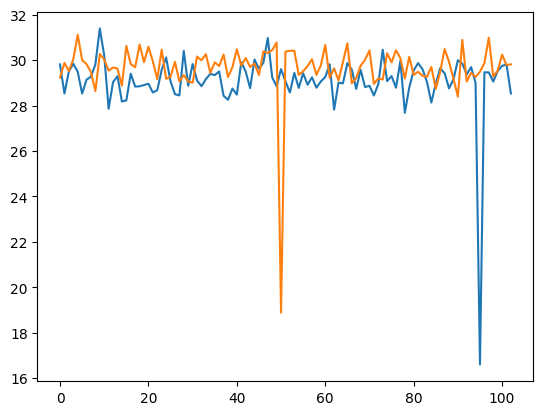

In [349]:
plt.plot(scores)

In [365]:
# ??? 
xx+((pow(X, -1, Y)*(yy-xx)) % Y)*X

7569

In [ ]:
# animation

In [389]:
start = 4135

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


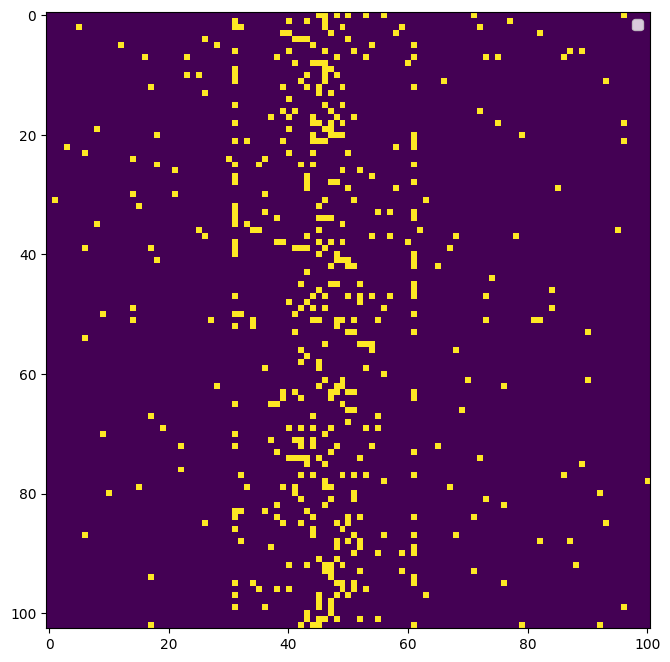

In [387]:
# dat = np.array([move(r, 100, X=X, Y=Y) for r in robots])
N = 100
fps = 5
fig = plt.figure(figsize=(8, 8))
start
snaps = []
for s in range(N):
    f = np.zeros((Y, X))
    for px, py in move(np_robs, start+s*101, X=X, Y=Y):
        f[py, px] = 1
    snaps.append(f[:])
    
    
im = plt.imshow(snaps[0], interpolation='none', label='0')
plt.legend()

def animate_func(i):
    im.set_array(snaps[i])
    # im.set_label
    return [im]

anim = animation.FuncAnimation(
    fig,
    animate_func,
    frames = N,
    interval = 1000 / fps
)

anim.save('test_anim.gif', fps = fps)

In [182]:
start + 34 * 101

7569

In [183]:
puzzle.answer_b = start + 34 * 101

That's the right answer!  You are one gold star closer to finding the Chief Historian.You have completed Day 14! You can [Shareon
  Bluesky
Twitter
Mastodon] this victory or [Return to Your Advent Calendar].
